# **Regresiones Lineales**

Comenzaremos con el análisis del modelo de regresión lineal, uno de los más simples que existen. Exploraremos dos métodos diferentes para entrenarlo:

- Ecuación de "forma cerrada": Este método calcula directamente los parámetros del modelo que mejor se ajustan al conjunto de entrenamiento, minimizando la función de coste.

- Descenso de gradiente (DG): Un método de optimización iterativo que ajusta gradualmente los parámetros del modelo para minimizar la función de coste, convergiendo finalmente a los mismos parámetros que el primer método.

Luego, estudiaremos la regresión polinómica, un modelo más complejo que puede ajustarse a conjuntos de datos no lineales. Dado que este modelo tiene más parámetros que la regresión lineal, es más propenso al sobreajuste. Exploraremos cómo detectar el sobreajuste utilizando curvas de aprendizaje y luego veremos varias técnicas de regularización para reducir este riesgo.

Finalmente, examinaremos otros dos modelos comúnmente utilizados para tareas de clasificación: la regresión logística y la regresión softmax.

# Regresión lineal

Se puede expresar de manera más concisa usando una forma vectorizada:

$$\hat{y} = ℎ_{θ}(x) = θ · x$$

En esta ecuación:

- $h_{θ}$ es la función de hipótesis usando los parámetros del modelo $θ$.
- $θ$ es el vector de parámetros, que incluye el sesgo $θ₀$ y los pesos $θ₁$ a $θ_n$.
- $x$ es el vector de características, que incluye $x₀$ a $x_n$, con $x₀ = 1$.
- $θ \cdot x$ es el producto punto de los vectores $θ$ y $x$, lo que equivale a $θ₀x₀ + θ₁x₁ + ... + θ_nx_n$.

En Machine Learning, los vectores suelen representarse como vectores columna. Si $θ$ y $x$ son vectores columna, la predicción es:

$$\hat{𝑦}=𝜃^⊺\times𝑥$$

Aquí, $θ^⊺$ es la transpuesta de $θ$ (vector fila), y $θ^⊺ \times x$ es la multiplicación de matrices, que da el mismo resultado que el producto punto, pero como una matriz de una sola celda en lugar de un escalar.

Entrenamiento del modelo: Para entrenar un modelo de regresión lineal, necesitamos ajustar sus parámetros para que el modelo se ajuste mejor al conjunto de entrenamiento. Esto se logra minimizando el error cuadrático medio (MSE):

$$𝑀𝑆𝐸(𝜃)=\frac{1}{𝑚}\sum_{i=1}{𝑚}(𝜃⊺𝑥𝑖−𝑦𝑖)2$$
 

Donde $m$ es el número de instancias en el conjunto de entrenamiento, $x_{i}$ es el vector de características de la $i$-ésima instancia, y $y_{i}$ es el valor objetivo correspondiente.

Para simplificar, escribimos $MSE(θ)$ en lugar de $MSE(X, h_{θ})$, ya que la función está parametrizada por $θ$.

Este enfoque es común porque minimizar el MSE es más sencillo que minimizar el RMSE y conduce al mismo resultado.

Nota: A menudo, en Machine Learning, la función de pérdida optimizada durante el entrenamiento es diferente de la métrica de rendimiento final. Esto se hace porque la función de pérdida es más fácil de optimizar y puede incluir términos adicionales para regularización.

## La Ecuación Normal

Para encontrar el valor de $θ$ que minimiza el $MSE$, existe una solución de forma cerrada, es decir, una ecuación matemática que da el resultado directamente. Esto se conoce como la ecuación normal.

$$\hat{θ} = (X^⊺X)^{−1}X^⊺y$$

En esta ecuación:

$\hat{θ}$ es el valor de $θ$ que minimiza la función de costo.
$y$ es el vector de valores objetivo que contiene $y^{(1)}$ a $y^{(m)}$

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt

In [2]:

np.random.seed(42)
m = 100 # número de instancias
X = 2 * np.random.rand(m, 1)  
y = 4 + 3 * X + np.random.randn(m, 1) 

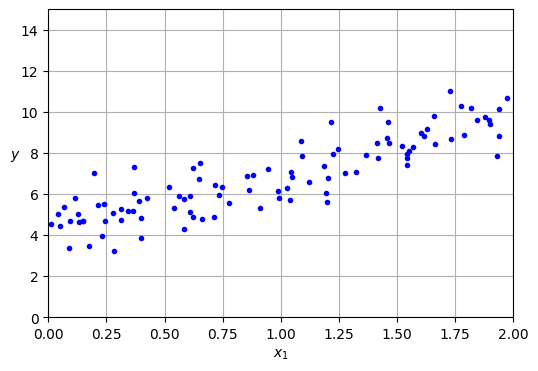

In [3]:

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

Ahora vamos a calcular $θ$ utilizando la ecuación Normal. Utilizaremos la función inv() del módulo álgebra lineal de NumPy (np.linalg) para calcular la inversa de una matriz, y el método dot() para la multiplicación de matrices:

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # añade x0 = 1 a cada instancia
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

El operador @ realiza la multiplicación de matrices. Si A y B son matrices NumPy, entonces A @ B es equivalente a np.matmul(A, B). Muchas otras bibliotecas, como TensorFlow, PyTorch y JAX, también soportan el operador @. Sin embargo, no se puede utilizar @ en arrays Python puros (es decir, listas de listas).

La función que hemos utilizado para generar los datos es $y = 4 + 3x1 + ruido \space gaussiano$. Veamos lo que encontró la ecuación:

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

Habríamos esperado $θ_0 = 4$ y $θ_1 = 3$ en lugar de $θ_0 = 4,215$ y $θ_1 = 2,770$. Se acercaba bastante, pero el ruido hacía imposible recuperar los parámetros exactos de la función original. Cuanto más pequeño y ruidoso es el conjunto de datos, más difícil resulta.
Ahora podemos hacer predicciones utilizando $θ$:

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # añade x0 = 1 a cada instancia
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

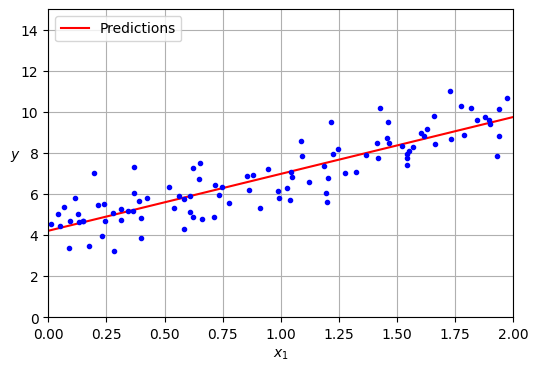

In [7]:

plt.figure(figsize=(6, 4))  
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")


plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

Realizar una regresión lineal con Scikit-Learn es relativamente sencillo:

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

La clase `LinearRegression` se basa en la función `scipy.linalg.lstsq()` (el nombre significa "mínimos cuadrados"), que podrías llamar directamente:

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

Esta función calcula $\mathbf{X}^+\mathbf{y}$, donde $\mathbf{X}^{+}$ es la _pseudoinversa_ de $\mathbf{X}$ (concretamente la inversa de Moore-Penrose). Puede utilizar `np.linalg.pinv()` para calcular la pseudoinversa directamente:

In [11]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

# Gradient Descent

El descenso de gradiente ajusta los parámetros de un modelo para minimizar la función de coste, como bajar una montaña buscando la pendiente más pronunciada. La tasa de aprendizaje controla el tamaño de los pasos: si es muy baja, el algoritmo será lento; si es alta, puede no encontrar el mínimo.

La función de coste en regresión lineal es convexa, lo que garantiza un único mínimo global que el descenso de gradiente puede alcanzar si se configura bien. Es importante escalar las características para que el algoritmo converja más rápido.

Entrenar un modelo significa encontrar los parámetros que minimicen la función de coste. En regresión lineal, esto es más sencillo gracias a la convexidad de la función.

## Batch Gradient Descent

Para implementar el descenso de gradiente, necesitas calcular el gradiente de la función de costo respecto a cada parámetro $θ_j$. Esto te indica cómo cambia la función de costo cuando ajustas $θ_j$ ligeramente. La fórmula para la derivada parcial del $MSE$ respecto a $θ_j$ es:

$$\frac{∂}{∂θ_j} MSE(θ) = \frac{2}{m} \sum_{i=1}^{m} (θ^⊺x^i - y^i) x_{j}^i$$

El vector gradiente (que contiene todas las derivadas parciales) se calcula como:

$$∇_θMSE(θ) = \begin{bmatrix} \frac{∂}{∂θ_0} MSE(θ) \\ \frac{∂}{∂θ_1} MSE(θ) \\ ⋮ \\ \frac{∂}{∂θ_n} MSE(θ) \end{bmatrix} = \frac{2}{m} X^⊺(Xθ - y) $$

ste cálculo se realiza sobre todo el conjunto de entrenamiento en cada paso, por eso se llama descenso de gradiente por lotes. Es más lento en grandes conjuntos de datos, pero escala bien con muchas características.

Para actualizar $θ$ y moverte cuesta abajo, restas el gradiente multiplicado por la tasa de aprendizaje $η$:

$$θ^{(next step)} = θ − η∇_θ MSE(θ)$$

In [12]:
eta = 0.1  # ratio de aprendizaje
n_epochs = 1000
m = len(X_b)  # número de instancias

np.random.seed(42)
theta = np.random.randn(2, 1)  # parámetros del modelo inicializados aleatoriamente

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

No ha sido tan difícil. Cada iteración sobre el conjunto de entrenamiento se llama epoch. Veamos el theta resultante:

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

¡Eso es exactamente lo que encontró la ecuación Normal! El descenso del Gradiente ha funcionado perfectamente. Pero, ¿y si hubieras utilizado una tasa de aprendizaje (eta) diferente? La figura muestra los 20 primeros pasos del descenso del Gradiente utilizando tres tasas de aprendizaje diferentes. La línea de la parte inferior de cada gráfico representa el punto de partida aleatorio y, a continuación, cada época está representada por una línea cada vez más oscura.

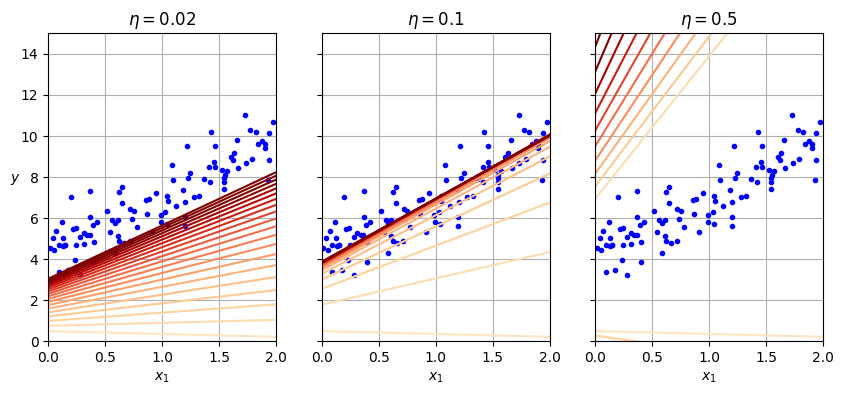

In [14]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1) # inicialización aleatoria

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

A la izquierda, la tasa de aprendizaje es demasiado baja: el algoritmo eventualmente llegará a la solución, pero tardará mucho. En el centro, la tasa de aprendizaje es adecuada: converge rápidamente en pocas épocas. A la derecha, la tasa es demasiado alta: el algoritmo diverge, saltando y alejándose de la solución en cada paso.

Para encontrar una buena tasa de aprendizaje, puedes usar gridsearch, pero limita el número de épocas para evitar que los modelos que tardan mucho en converger sean seleccionados. El número de épocas debe ser lo suficientemente alto para que el algoritmo se acerque a la solución, pero no tanto como para perder tiempo cuando ya no hay cambios significativos.

Una solución sencilla es establecer un número grande de épocas y detener el algoritmo cuando el vector gradiente sea pequeño, es decir, cuando su norma sea menor que un pequeño número $ϵ$ (tolerancia), lo que indica que el algoritmo ha casi alcanzado el mínimo.

## Stochastic Gradient Descent

El descenso de gradiente por lotes utiliza todo el conjunto de entrenamiento para calcular los gradientes en cada paso, lo que lo hace lento con grandes conjuntos de datos. En contraste, el descenso de gradiente estocástico elige una instancia aleatoria por paso, calculando los gradientes rápidamente con esa única instancia. Esto lo hace mucho más rápido y permite entrenar con conjuntos de datos enormes.

Sin embargo, debido a su aleatoriedad, el descenso de gradiente estocástico es menos regular: en lugar de bajar suavemente hacia el mínimo, la función de coste oscila, acercándose al mínimo pero sin asentarse completamente. Esto puede ser ventajoso para escapar de mínimos locales y acercarse al mínimo global.

Para resolver el problema de la aleatoriedad, se puede reducir gradualmente la tasa de aprendizaje: comenzando con pasos grandes para un progreso rápido y luego haciendo los pasos más pequeños para que el algoritmo se asiente en el mínimo global. Este enfoque es similar al recocido simulado, donde la tasa de aprendizaje (llamada programa de aprendizaje) se reduce lentamente. Si la tasa se reduce demasiado rápido, podrías quedar atrapado en un mínimo local; si se reduce demasiado lento, podrías rebotar alrededor del mínimo por mucho tiempo.

In [15]:
theta_path_sgd = []  # necesitamos almacenar la trayectoria de theta en el
                     # espacio de parámetros para trazar la siguiente figura

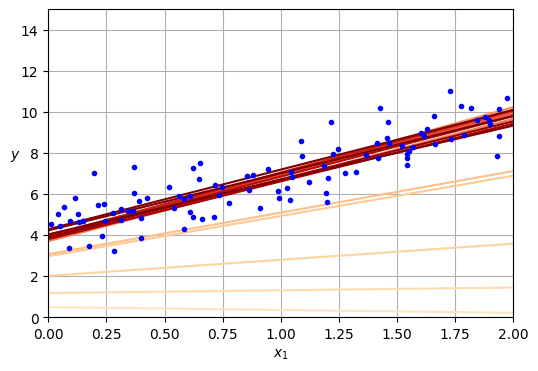

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # hiperparámetros del programa de aprendizaje

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  

n_shown = 20  
plt.figure(figsize=(6, 4)) 

for epoch in range(n_epochs):
    for iteration in range(m):

        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # para SGD, no dividir por m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta) 


plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

Por convención, iteramos por rondas de $m$ iteraciones; cada ronda se denomina época, como antes. Mientras que el código del descenso del Gradiente por lotes itera 1.000 veces a través de todo el conjunto de entrenamiento, este código lo hace sólo 50 veces y alcanza una solución bastante buena:

In [17]:
theta

array([[4.21076011],
       [2.74856079]])

En el descenso de gradiente estocástico (SGD), las instancias se eligen aleatoriamente en cada época, lo que significa que algunas pueden ser seleccionadas varias veces, mientras que otras podrían no ser elegidas. Para asegurarte de que el algoritmo pasa por todas las instancias en cada época, podrías barajar el conjunto de entrenamiento antes de cada iteración. Sin embargo, este enfoque es más complejo y no suele mejorar significativamente los resultados.

Para realizar una regresión lineal con SGD en Scikit-Learn, puedes usar la clase SGDRegressor, que optimiza la función de coste MSE por defecto. Puedes configurarlo para ejecutarse hasta un máximo de 1,000 épocas (max_iter) o hasta que la pérdida disminuya menos de $10^{-5}$ (tol) durante 100 épocas. Comienza con una tasa de aprendizaje de 0.01 (eta0), utilizando el programa de aprendizaje predeterminado, y sin regularización (penalty=None).


In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

Una vez más, se encuentra una solución bastante cercana a la que devuelve la ecuación Normal:

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

Todos los estimadores de Scikit-Learn pueden entrenarse usando el método fit(), pero algunos también tienen un método partial_fit(), que permite entrenar el modelo en una o más instancias de forma incremental. Al llamar repetidamente a partial_fit(), se entrena gradualmente el modelo, lo cual es útil para tener más control sobre el proceso.

Algunos modelos también tienen el hiperparámetro warm_start. Si warm_start=True, llamar a fit() en un modelo entrenado continuará el entrenamiento desde donde se dejó, en lugar de reiniciarlo. Esto respeta hiperparámetros como max_iter y tol. Sin embargo, ten en cuenta que fit() reinicia el contador de iteraciones del programa de aprendizaje, mientras que partial_fit() no lo hace.

## Mini-batch gradient descent

El descenso de gradiente por mini lotes es un punto intermedio entre el descenso de gradiente por lotes y el estocástico. En lugar de calcular los gradientes usando todo el conjunto de entrenamiento (como en el descenso por lotes) o solo una instancia (como en el estocástico), el descenso por mini lotes usa pequeños conjuntos aleatorios de instancias, llamados minilotes.

Ventajas:

- Mejora el rendimiento gracias a la optimización por hardware, especialmente con GPU.
- El progreso es menos errático que con el descenso estocástico, lo que lo acerca más al mínimo.

Desventajas:

- Puede ser más difícil escapar de mínimos locales en problemas complejos.

En resumen, el descenso por mini lotes combina la estabilidad del descenso por lotes con la velocidad del estocástico, aunque requiere un buen programa de aprendizaje para acercarse al mínimo global.

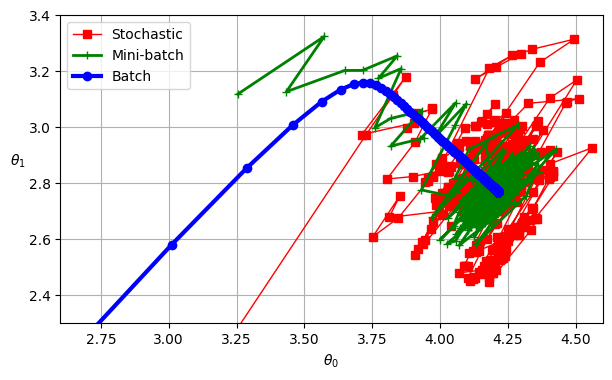

In [20]:

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # inicialización aleatoria

t0, t1 = 200, 1000  # hiperparámetros del programa de aprendizaje

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

compara los algoritmos que hemos analizado hasta ahora para la regresión lineal (recuerde que m es el número de instancias de entrenamiento y n es el número de características).

|Algoritmo| Gran m |Soporte fuera de núcleo| Gran n| Hiperparámetros| Escalado necesario| Scikit-Learn|
|---|---|---|---|---|---|---|
|Ecuación normal| Rápido| No| Lento| 0 |No| N/A|
|SVD |Rápido |No |Lento| 0 |No |LinearRegression|
|Batch GD| Lento| No| Rápido| 2| Sí| N/A|
|Estocástico GD| Rápido| Sí| Rápido| ≥2| Sí| SGDRegressor|
|Mini-batch GD| Rápido| Sí| Rápido| ≥2| Sí| N/A||

Casi no hay diferencias después del entrenamiento: todos estos algoritmos acaban con modelos muy similares y hacen predicciones exactamente de la misma manera.

# Regresión polinómica

¿Y si los datos son más complejos que una línea recta? Sorprendentemente, puede utilizar un modelo lineal para ajustar datos no lineales. Una forma sencilla de hacerlo es añadir potencias de cada característica como nuevas características y, a continuación, entrenar un modelo lineal en este conjunto ampliado de características. Esta técnica se denomina regresión polinómica.

Veamos un ejemplo. Primero, generaremos algunos datos no lineales, basados en una simple ecuación cuadrática, es decir, una ecuación de la forma $ y = ax^2 + bx + c $, más algo de ruido:

In [21]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

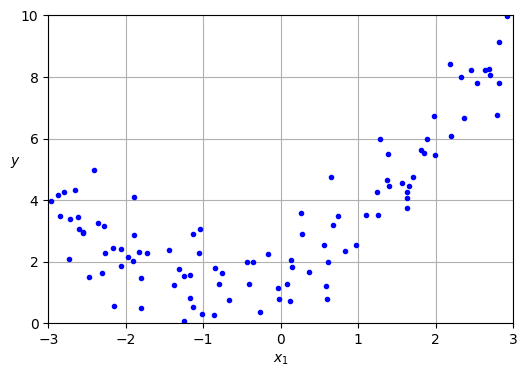

In [22]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Está claro que una línea recta nunca se ajustará correctamente a estos datos. Así que vamos a utilizar la clase PolynomialFeatures de Scikit-Learn para transformar nuestros datos de entrenamiento, añadiendo el cuadrado (polinomio de segundo grado) de cada característica en el conjunto de entrenamiento como una nueva característica (en este caso sólo hay una característica):


In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [24]:
X_poly[0]

array([-0.75275929,  0.56664654])

X_poly contiene ahora la característica original de X más el cuadrado de esta característica. Ahora podemos ajustar un modelo de regresión lineal a estos datos de entrenamiento ampliados:

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

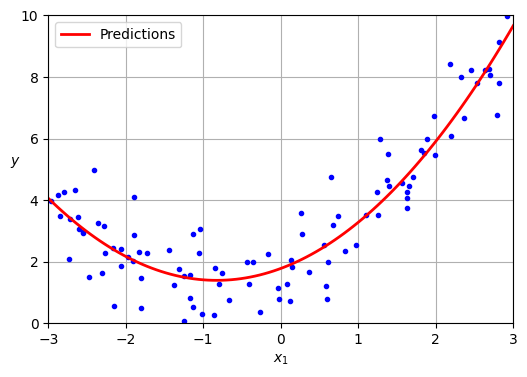

In [26]:

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

No está mal: el modelo estima $ y = 0.56x1^2 + 0.93x1 + 1.78 $ cuando de hecho la función original era $ y = 0.5x1^2 + 1.0x1 + 2.0 $ más ruido Gaussiano. 

Ten en cuenta que cuando hay múltiples características, la regresión polinómica es capaz de encontrar relaciones entre características, lo cual es algo que un modelo de regresión lineal simple no puede hacer. Esto es posible gracias a que PolynomialFeatures también agrega todas las combinaciones de características hasta el grado dado. Por ejemplo, si hubiera dos características a y b, PolynomialFeatures con degree=3 no solo agregaría las características a², a³, b² y b³, sino también las combinaciones ab, a²b y ab².


¡PolynomialFeatures(degree=d) transforma una matriz que contiene n características en una matriz que contiene $(n + d)! / d!n!$ es el factorial de n, igual a $1 × 2 × 3 × ⋯ × n$. ¡Cuidado con la explosión combinatoria del número de características!

# Curvas de aprendizaje

Si realiza una regresión polinómica de alto grado, probablemente ajustará los datos de entrenamiento mucho mejor que con una regresión lineal pura. Por ejemplo, la Figura aplica un modelo polinómico de 300 grados a los datos de entrenamiento anteriores y compara el resultado con un modelo lineal puro y un modelo cuadrático (polinómico de segundo grado). Observe cómo el modelo polinómico de 300 grados se contonea para acercarse lo más posible a las instancias de entrenamiento

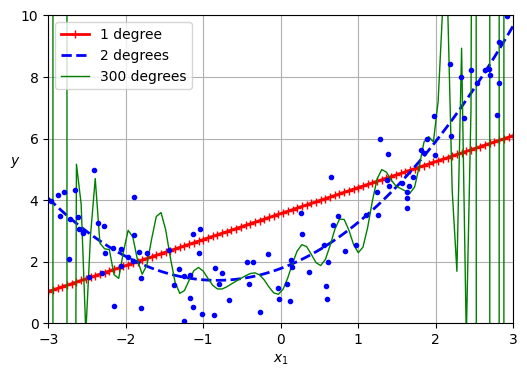

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

El modelo de regresión polinómica de alto grado tiende a sobrefit (sobreajustar) los datos de entrenamiento, mientras que el modelo lineal tiende a underfit (subajustar). El modelo cuadrático generalmente generaliza mejor en este caso, ya que los datos se generaron con una función cuadrática. Sin embargo, en la práctica, no siempre sabrás cuál es la función generadora de los datos, por lo que necesitas herramientas para decidir la complejidad adecuada de tu modelo.

Cross-Validation se utiliza para estimar el rendimiento de generalización de un modelo. Si el modelo rinde bien en los datos de entrenamiento pero mal en validación, está sobreajustando. Si rinde mal en ambos, está subajustando.

Otra herramienta útil son las curvas de aprendizaje, que muestran el error de entrenamiento y validación a lo largo de las iteraciones de entrenamiento. Si el modelo no permite entrenamiento incremental, puedes entrenarlo varias veces en subconjuntos crecientes del conjunto de entrenamiento.

Scikit-Learn ofrece la función learning_curve(), que entrena y evalúa el modelo usando Cross-Validation, generando curvas de aprendizaje. Esta función puede reentrenar el modelo en subconjuntos crecientes del conjunto de entrenamiento, o entrenarlo de manera incremental si el modelo lo permite, configurando exploit_incremental_learning=True.

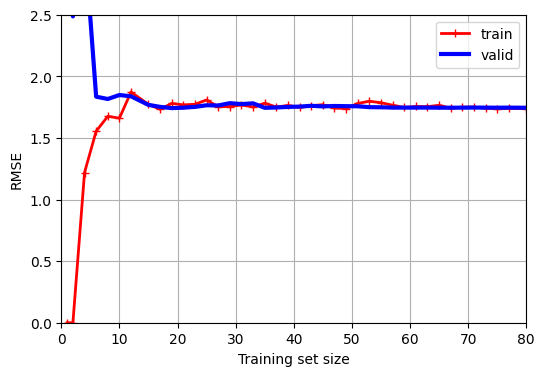

In [28]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show()

Este modelo está subajustado. Veamos por qué:

1. Error de entrenamiento: Cuando el conjunto de entrenamiento es pequeño, el modelo puede ajustarse perfectamente a los pocos datos disponibles, por lo que la curva de error comienza en cero. A medida que se añaden más datos, el modelo no puede ajustarse perfectamente debido al ruido y a la naturaleza no lineal de los datos, por lo que el error de entrenamiento aumenta y luego se estabiliza en una meseta.

2. Error de validación: Con pocas instancias de entrenamiento, el modelo no generaliza bien, lo que hace que el error de validación sea alto inicialmente. A medida que se añaden más ejemplos, el modelo mejora y el error de validación disminuye, pero luego también se estabiliza en una meseta, cerca del error de entrenamiento.

Estas curvas de aprendizaje son típicas de un modelo subajustado: ambas curvas están altas, cercanas entre sí, y se han estabilizado. En este caso, agregar más datos de entrenamiento no mejorará el rendimiento. La solución es usar un modelo más complejo o mejorar las características.

Veamos ahora las curvas de aprendizaje de un modelo polinómico de 10º grado sobre los mismos datos

In [29]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

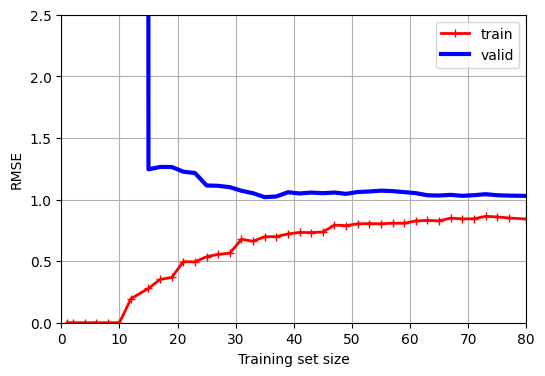

In [30]:

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

Estas curvas de aprendizaje se parecen un poco a las anteriores, pero hay dos diferencias muy importantes:
- El error en los datos de entrenamiento es mucho menor que antes.
- Hay un hueco entre las curvas. Esto significa que el modelo funciona mucho mejor con los datos de entrenamiento que con los datos de validación, lo que caracteriza a un modelo sobreajustado. Sin embargo, si se utilizara un conjunto de datos de entrenamiento mucho mayor, las dos curvas seguirían acercándose.

Una forma de mejorar un modelo sobreajustado es introducir más datos de entrenamiento hasta que el error de validación alcance el error de entrenamiento.

## El equilibrio entre sesgo y varianza

El error de generalización de un modelo se descompone en tres componentes:

- Sesgo: Error causado por suposiciones incorrectas, como suponer que los datos son lineales cuando en realidad no lo son. Un modelo con alto sesgo no se ajusta bien a los datos de entrenamiento.

- Varianza: Error debido a la sensibilidad excesiva del modelo a pequeñas variaciones en los datos. Un modelo muy complejo, como un polinómico de alto grado, tiende a tener alta varianza y sobreajusta los datos de entrenamiento.

- Error irreductible: Error inherente al ruido en los datos. La única manera de reducirlo es limpiando los datos.

Aumentar la complejidad de un modelo generalmente reduce el sesgo pero aumenta la varianza, y viceversa. Este es el equilibrio entre sesgo y varianza.

# Modelos lineales regularizados

Una buena forma de reducir el sobreajuste es regularizar el modelo (es decir, restringirlo): cuantos menos grados de libertad tenga, más difícil será que sobreajuste los datos. Una forma sencilla de regularizar un modelo polinómico es reducir el número de grados polinómicos.

Para un modelo lineal, la regularización se consigue normalmente restringiendo los pesos del modelo. Ahora veremos la regresión de Ridge, la regresión de Lasso y la regresión de ElasticNet, que implementan tres formas diferentes de restringir los pesos.


## Regresión Ridge

Es una versión regularizada de la regresión lineal. Añade un término de regularización al MSE:
$ J(θ) = MSE(θ) + \frac{α}{m} \sum_{i=1}^{n} θ_{i}^2 $

Este término de regularización obliga al modelo a mantener los pesos $θ_i$ lo más pequeños posible, lo que ayuda a prevenir el sobreajuste. El hiperparámetro $α$ controla la intensidad de esta regularización:

- Si $α = 0$, la regresión Ridge es equivalente a la regresión lineal.
- Si $α$ es grande, los pesos se acercan a cero, resultando en una línea casi plana.

Importante: El término de regularización solo se añade durante el entrenamiento, no al evaluar el modelo.

Para descenso de gradiente por lotes, solo se necesita añadir $\frac{2αw}{m}$ al gradiente de los pesos, sin modificar el gradiente del término de sesgo $θ_0$.


Es importante escalar los datos (por ejemplo, utilizando un StandardScaler) antes de realizar la regresión ridge, ya que es sensible a la escala de las características de entrada. Esto ocurre con la mayoría de los modelos regularizados.

Generemos un conjunto de datos lineales muy pequeño y ruidoso:

In [31]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

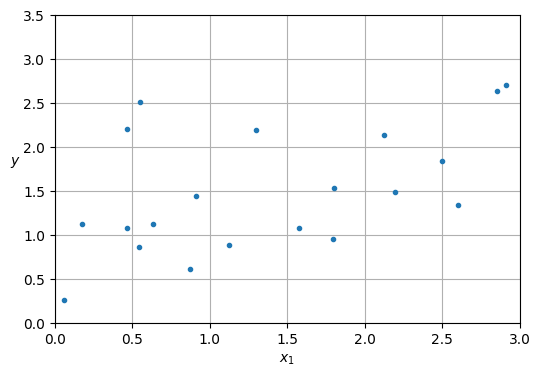

In [32]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [33]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55325833])

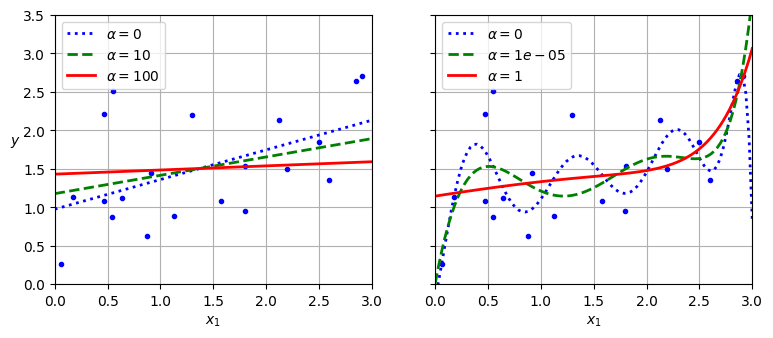

In [34]:

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

La regresión Ridge ajusta modelos lineales para controlar el sobreajuste mediante regularización. En la figura mencionada:

- Izquierda: Se usan modelos Ridge simples, lo que da predicciones lineales.

- Derecha: Los datos se expanden a características polinómicas de grado 10, se escalan, y luego se aplica la regresión Ridge. A medida que el valor de $α$ aumenta, las predicciones se vuelven más planas, reduciendo la varianza pero aumentando el sesgo.

Al igual que con la regresión lineal, la regresión Ridge puede resolverse de dos maneras:

1. Ecuación de forma cerrada: Proporciona una solución exacta.

2. Descenso de gradiente: Aproxima la solución iterativamente.

La solución de forma cerrada para la regresión Ridge es:

$ θ = (X^⊺X + αA)^{−1}X^⊺y $

Donde $A$ es la matriz identidad con un 0 en la celda correspondiente al término de sesgo.

En Scikit-Learn, puedes realizar la regresión Ridge utilizando una variante de esta ecuación con la técnica de factorización de matrices de Cholesky.


In [35]:
# mostrar que obtenemos aproximadamente la misma solución que antes cuando
# utilizamos el promedio estocástico GD (solver="sag")
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55326019])

Y utilizando el descenso de gradiente estocástico:

In [36]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() porque fit() espera objetivos 1D
sgd_reg.predict([[1.5]])

array([1.55302613])

El hiperparámetro de penalización en SGD determina el tipo de regularización a aplicar. Especificar "l2" añade un término de regularización a la función de coste MSE, igual a $α$ veces el cuadrado de la norma $ℓ2$ del vector de pesos. Esto es similar a la regresión Ridge, pero sin la división por $m$. Por eso, se pasa alpha=0.1 / m para obtener un resultado equivalente a Ridge(alpha=0.1).

La clase RidgeCV también realiza regresión Ridge, pero ajusta automáticamente el hiperparámetro $α$ mediante Cross-Validation. Es similar a usar GridSearchCV, pero está optimizado para la regresión Ridge, lo que lo hace más rápido. Otros estimadores lineales, como LassoCV y ElasticNetCV, también tienen variantes con Cross-Validation eficiente.

In [37]:
# muestra la solución de forma cerrada de la regresión Ridge,
# comparar con los parámetros aprendidos del modelo Ridge
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [38]:
ridge_reg.intercept_, ridge_reg.coef_ 

(array([0.97896386]), array([0.38286422]))

## Regresión Lasso

La regresión Lasso (Least Absolute Shrinkage and Selection Operator) es otra versión regularizada de la regresión lineal. Similar a la regresión Ridge, añade un término de regularización a la función de coste, pero utiliza la norma $ℓ1$ del vector de pesos en lugar del cuadrado de la norma $ℓ2$.

En la regresión Lasso, la norma $ℓ1$ se multiplica por $2α$, mientras que en la regresión Ridge, la norma $ℓ2$ se multiplica por $\frac{α}{m}$. Estos factores se eligen para asegurar que el valor óptimo de $α$ sea independiente del tamaño del conjunto de entrenamiento, ya que diferentes normas requieren diferentes factores.

La función de coste de la regresión Lasso se define como:

$$J(\theta) = MSE(\theta) + 2\alpha \sum_{i=1}^{n} |\theta_i| $$

Donde:

- $J(\theta)$ es la función de coste total.
- $\text{MSE}(\theta)$ es el error cuadrático medio (Mean Squared Error).
- $2\alpha \sum_{i=1}^{n} |\theta_i|$ es el término de regularización Lasso, donde $|\theta_i|$ es la norma $ℓ1$ de los pesos.

Este término de regularización ayuda a reducir la magnitud de los pesos y puede llevar a que algunos de ellos sean exactamente cero, lo que efectivamente selecciona características.

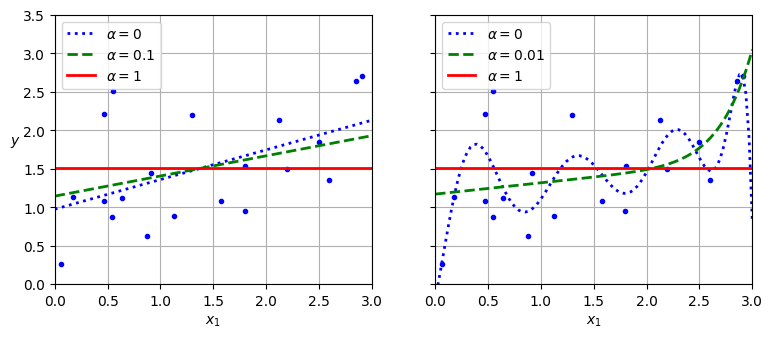

In [39]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Tiene la notable capacidad de eliminar los pesos de las características menos importantes, es decir, los ajusta a cero. Esto significa que Lasso realiza automáticamente la selección de características, produciendo un modelo más simple y con menos características relevantes.

Por ejemplo, en el gráfico mencionado (Figura 4-18), con $α = 0.01$, el modelo resultante es aproximadamente cúbico, ya que las características polinómicas de alto grado han sido eliminadas (sus pesos son cero).

Esto ocurre debido a cómo funciona la regularización $ℓ1$. En el gráfico superior izquierdo de la Figura 4-19, los contornos representan la pérdida $ℓ1$ ($|θ1| + |θ2|$), que decrece linealmente hacia los ejes. Cuando se aplica el descenso de gradiente, los parámetros tienden a reducirse, y aquellos que están más cerca de cero llegan a cero primero, lo que crea un "canalón" que luego lleva el modelo a eliminar ciertos parámetros.

En el gráfico superior derecho, los contornos representan la función de coste de la regresión Lasso (MSE más pérdida $ℓ1$). A medida que el descenso de gradiente ajusta los parámetros, uno de ellos llega a cero rápidamente, y el algoritmo sigue un camino que lleva al óptimo global, aunque con cierto "rebote". Si se aumenta $α$, el óptimo global se mueve hacia valores más pequeños de los parámetros, eliminando más características; si se disminuye $α$, el modelo retiene más características.

En resumen, la regresión Lasso no solo ajusta el modelo a los datos, sino que también simplifica el modelo al eliminar características innecesarias, logrando un equilibrio entre ajuste y simplicidad.

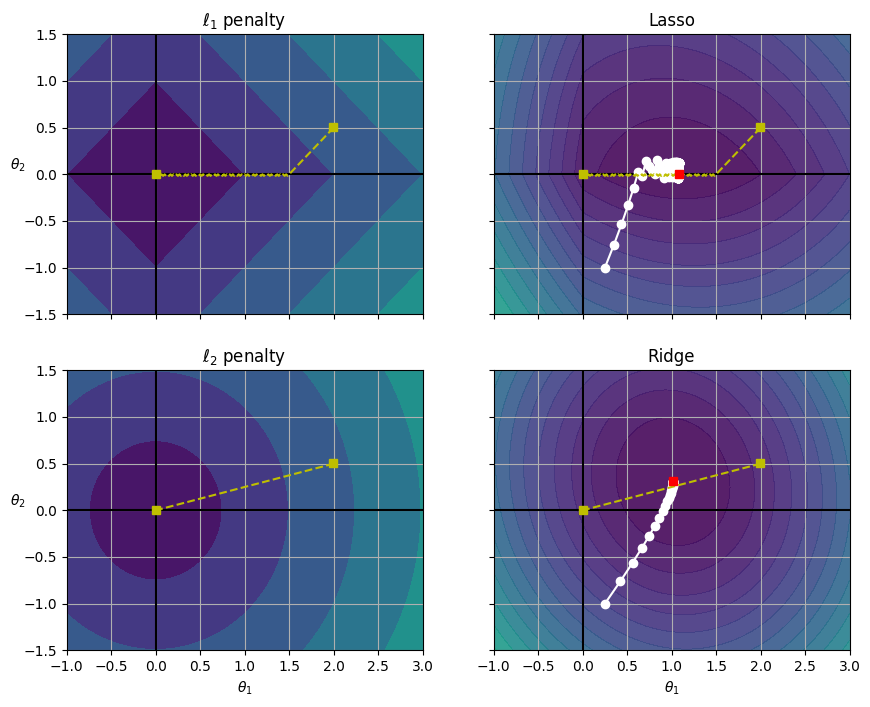

In [40]:

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

plt.show()

Se ilustran las diferencias entre la regresión Lasso (filas superiores) y la regresión Ridge (filas inferiores) en función de los contornos de las funciones de pérdida.

- Parte superior izquierda (Lasso, solo $ℓ1$):

    - Los contornos en forma de diamante muestran cómo la penalización $ℓ1$ afecta a la función de pérdida, disminuyendo linealmente hacia los ejes.
    - El descenso de gradiente sigue un camino discontinuo (línea amarilla), lo que lleva a uno de los parámetros a 0 primero. Esto representa la capacidad de Lasso para eliminar características (dejar sus pesos en 0).

- Parte superior derecha (Lasso, MSE + $ℓ1$):

    - Aquí se combinan el MSE con la penalización $ℓ1$. Los pequeños círculos blancos muestran el recorrido del descenso de gradiente, que lleva rápidamente uno de los parámetros a 0, luego avanza hacia el óptimo global (cuadrado rojo).
    - El rebote alrededor del óptimo es notable porque los gradientes no se acercan a cero, lo que puede requerir una reducción de la tasa de aprendizaje para estabilizar la convergencia.

- Parte inferior izquierda (Ridge, solo $ℓ2$):

    - Los contornos circulares muestran cómo la penalización $ℓ2$ suaviza la función de pérdida.
    - El descenso de gradiente sigue un camino recto hacia el origen, disminuyendo los parámetros gradualmente pero sin llevar ninguno a cero.

- Parte inferior derecha (Ridge, MSE + $ℓ2$):

    - Aquí, el MSE se combina con la penalización $ℓ2$. El recorrido del descenso de gradiente es más suave y directo hacia el óptimo global, con una reducción gradual de los gradientes a medida que los parámetros se acercan al mínimo.
    - Esto demuestra que Ridge no elimina completamente los parámetros, sino que los reduce de manera uniforme.

Conclusión:
- Lasso es útil para la selección de características, ya que puede llevar algunos parámetros a cero.
- Ridge reduce todos los parámetros de manera uniforme, evitando que alguno llegue a cero, y tiende a converger más suavemente al óptimo.

In [41]:

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

Tenga en cuenta que podría utilizar SGDRegressor(penalty="l1", alpha=0.1).

## Elastic Net

Combina lo mejor de Ridge y Lasso. Su término de regularización es una mezcla ponderada de los términos de regularización de Ridge y Lasso, controlada por un parámetro de mezcla $r$:

- Cuando $r = 0$, la red elástica es equivalente a Ridge.
- Cuando $r = 1$, es equivalente a Lasso.

La función de coste de la red elástica es:

$$ 𝐽(𝜃) = 𝑀𝑆𝐸(𝜃) + 𝑟⋅𝛼 \sum_{𝑖=1}^{𝑛}∣𝜃𝑖∣+\frac{1−𝑟}{2}⋅\frac{𝛼}{𝑚}\sum_{𝑖=1}^{𝑛}𝜃_{𝑖}^2 $$

¿Cuándo usar cada tipo de regresión?

- Regresión Lineal Simple: En general, se debe evitar, ya que es mejor tener algo de regularización.
- Ridge: Buena opción por defecto, adecuada cuando no se tiene certeza sobre la relevancia de las características.
- Lasso: Preferible si se sospecha que solo unas pocas características son útiles, ya que puede reducir a cero los pesos de las características menos relevantes.
- ElasticNet: Generalmente preferido sobre Lasso cuando el número de características es mayor que el número de instancias de entrenamiento o cuando hay correlación fuerte entre características, ya que es más estable.

In [42]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping

Es una técnica de regularización para algoritmos de aprendizaje iterativos, como el descenso de gradiente. En lugar de entrenar hasta completar todas las épocas, se detiene el entrenamiento cuando el error de validación alcanza su mínimo y comienza a aumentar, señalando el inicio del sobreajuste.

Explicación:
- En el caso de un modelo complejo, como la regresión polinómica de alto grado, el error de predicción (RMSE) en los conjuntos de entrenamiento y validación disminuye inicialmente a medida que avanza el entrenamiento.
- Sin embargo, tras un cierto número de épocas, el error de validación comienza a aumentar, indicando que el modelo ha comenzado a sobreajustar.
- Con parada temprana, el entrenamiento se detiene en el punto en que el error de validación es mínimo.

Geoffrey Hinton la calificó como un "hermoso almuerzo gratis" por su sencillez y eficacia.

Desafío con Descenso Estocástico y Mini-batch:

- Con descenso estocástico o mini-batch, las curvas de error son menos suaves, lo que dificulta identificar cuándo se ha alcanzado el mínimo.
- La solución es detenerse solo después de que el error de validación haya superado el mínimo durante un tiempo, y luego retroceder los parámetros del modelo hasta el punto en que el error de validación era mínimo.

Conclusión:
 
La parada temprana es una técnica simple pero poderosa para evitar el sobreajuste durante el entrenamiento, especialmente efectiva cuando se aplica correctamente, incluso en escenarios más ruidosos como el descenso estocástico.

In [43]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# código extra - crea el mismo conjunto de datos cuadráticos que antes y lo divide
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # código extra - es para la figura de abajo

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # código extra - evaluamos el error del tren y lo guardamos para la figura
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

TypeError: got an unexpected keyword argument 'squared'

Preprocesamiento:

- Expansión polinómica: Se añaden características polinómicas.
- Escalado: Se escalan las características tanto del conjunto de entrenamiento como del conjunto de validación.

Modelo:

- Se crea un SGDRegressor sin regularización y con una tasa de aprendizaje pequeña.
- En lugar de usar fit(), se usa partial_fit() en un bucle para realizar el aprendizaje incremental.

Evaluación durante el entrenamiento:

- En cada época, se mide el RMSE en el conjunto de validación.
- Si el RMSE actual es menor que el más bajo observado hasta el momento, se guarda una copia del modelo en la variable best_model.

Copia del modelo:

- Se usa copy.deepcopy() para guardar el mejor modelo, lo que asegura que tanto los hiperparámetros como los parámetros aprendidos se copian.
- sklearn.base.clone() solo copiaría los hiperparámetros, por lo que no es adecuado para esta tarea.

# Logistic Regression

Algunos algoritmos de regresión pueden utilizarse para la clasificación (y viceversa). La regresión logística (también llamada regresión logit) suele utilizarse para estimar la probabilidad de que un caso pertenezca a una clase determinada (por ejemplo, ¿cuál es la probabilidad de que este correo electrónico sea spam?). Si la probabilidad estimada es superior a un umbral determinado (normalmente el 50%), el modelo predice que la instancia pertenece a esa clase (denominada clase positiva, etiquetada como "1") y, en caso contrario, predice que no (es decir, que pertenece a la clase negativa, etiquetada como "0"). Se trata, por tanto, de un clasificador binario.

## Estimación de probabilidades

La regresión logística funciona de manera similar a la regresión lineal, pero con una diferencia clave. Mientras que el modelo de regresión lineal calcula una suma ponderada de las características de entrada (más un término de sesgo) y devuelve ese resultado directamente, el modelo de regresión logística aplica la función logística (o sigmoide) a este resultado para obtener una probabilidad.

La probabilidad estimada por el modelo se expresa en forma vectorizada como:

$$
p = h_\theta(x) = \sigma(\theta^\top x)
$$

La función logística, denotada como 𝜎(⋅), es una función sigmoide que convierte el resultado en un valor entre 0 y 1, según la siguiente fórmula:

$$
\sigma(t) = \frac{1}{1 + \exp(-t)}
$$

Esta función tiene forma de "S" y es utilizada para modelar probabilidades en regresión logística

In [ ]:

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

En un modelo de regresión logística, la predicción se realiza comparando la probabilidad estimada (𝑝) con un umbral del 50%. Si la probabilidad es mayor o igual a 0.5, se predice 1; en caso contrario, se predice 0. La función sigmoide asegura que esto ocurra según el signo de 
$𝜃^⊤𝑥$

$$
y = 
\begin{cases} 
0 & \text{si } 𝑝 < 0.5 \\
1 & \text{si } 𝑝 \geq 0.5 
\end{cases}
$$

- 𝑝: Probabilidad de que la instancia 𝑥 pertenezca a la clase positiva.
- $𝜃^⊤𝑥$: Producto escalar entre el vector de parámetros del modelo (𝜃) y el vector de características de la instancia (𝑥).

El score 𝑡 es comúnmente llamado logit. Este nombre proviene del hecho de que la función logit, definida como

$$
\text{logit}(p) = \log\left(\frac{p}{1 - p}\right)
$$

es la inversa de la función logística. Si calculas el logit de la probabilidad estimada 
𝑝, obtendrás como resultado 𝑡. El logit también se conoce como log-odds o logaritmo de las probabilidades, ya que es el logaritmo de la razón entre la probabilidad estimada para la clase positiva y la probabilidad estimada para la clase negativa.

## Función de formación y costes

Para entrenar un modelo de regresión logística, el objetivo es ajustar el vector de parámetros 
𝜃 de manera que el modelo estime altas probabilidades para las instancias positivas (𝑦=1) y bajas probabilidades para las instancias negativas (𝑦=0). Esto se logra minimizando una función de costo.

La función de costo para una sola instancia de entrenamiento 𝑥 se define de la siguiente manera:

$$
\text{Costo}(\theta) = 
\begin{cases} 
- \log(p) & \text{si } y = 1 \\
- \log(1 - p) & \text{si } y = 0 
\end{cases}
$$

Esta función tiene sentido porque 
−log(𝑡) crece mucho cuando 𝑡 se aproxima a 0, lo que significa que el costo será alto si el modelo estima una probabilidad cercana a 0 para una instancia positiva, o si estima una probabilidad cercana a 1 para una instancia negativa. Por el contrario, 
−log⁡(𝑡) es cercano a 0 cuando 𝑡 está cerca de 1, lo que implica un costo bajo si la probabilidad estimada es correcta (cerca de 0 para una instancia negativa o cerca de 1 para una instancia positiva).

La función de costo para todo el conjunto de entrenamiento se calcula como el promedio de los costos de todas las instancias. Esta expresión se conoce como log loss o pérdida logarítmica:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

- p: Probabilidad estimada de que una instancia pertenezca a la clase positiva.
- 𝑦: Valor real de la clase para la instancia (1 para positiva, 0 para negativa).
- 𝑚: Número total de instancias en el conjunto de entrenamiento.
- 𝐽(𝜃): Función de costo total o log loss.

Este enfoque garantiza que el modelo minimice los errores de clasificación al ajustar 𝜃 para que las predicciones sean lo más precisas posibles.

## Límites de la decisión

Podemos utilizar el conjunto de datos iris para ilustrar la regresión logística. Este es un famoso conjunto de datos que contiene las longitudes y anchuras de los sépalos y pétalos de 150 flores de iris de tres especies diferentes: Iris setosa, Iris versicolor y Iris virginica.

Este conjunto de datos es comúnmente utilizado en el aprendizaje automático para problemas de clasificación, donde se intenta predecir la especie de una flor en función de sus características morfológicas.

Intentemos construir un clasificador para detectar el tipo de Iris virginica basándonos únicamente en la característica de anchura de los pétalos. El primer paso es cargar los datos y echar un vistazo rápido:

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

In [ ]:
print(iris.DESCR)

In [ ]:
iris.data.head(3)

In [ ]:
iris.target.head(3)  # ten en cuenta que las instancias no se mezclan

In [ ]:
iris.target_names

A continuación, dividiremos los datos y entrenaremos un modelo de regresión logística en el conjunto de entrenamiento:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

Veamos las probabilidades estimadas del modelo para flores con anchuras de pétalo que varían de
de 0 cm a 3 cm

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # remodelar para obtener un vector columna
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3)) 
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

El ancho de los pétalos de Iris virginica varía entre 1.4 cm y 2.5 cm. El clasificador predice con alta confianza que es Iris virginica si el ancho es mayor a 2 cm, y que no lo es si es menor a 1 cm. La frontera de decisión está en 1.6 cm: por encima predice Iris virginica, y por debajo, predice que no lo es.

In [ ]:
decision_boundary

In [ ]:
log_reg.predict([[1.7], [1.5]])

En un gráfico que muestra las características de ancho y largo de los pétalos del conjunto de datos, un clasificador de regresión logística entrenado puede estimar la probabilidad de que una nueva flor sea Iris virginica basado en estas dos características. La línea discontinua en el gráfico representa la frontera de decisión, donde la probabilidad estimada es del 50%. Esta frontera es lineal. Las líneas paralelas indican diferentes probabilidades, desde el 15% (esquina inferior izquierda) hasta el 90% (esquina superior derecha). Las flores más allá de la línea superior derecha tienen más del 90% de probabilidad de ser Iris virginica.

In [ ]:

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# para el gráfico de contornos
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # una instancia por punto de la figura
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# para el límite de decisión
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "No Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura del pétalo")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

El hiperparámetro que controla la fuerza de regularización de un modelo LogisticRegression de Scikit-Learn no es alfa (como en otros modelos lineales), sino su inverso: C. Cuanto mayor sea el valor de C, menor será la regularización del modelo.

## Softmax Regression

La regresión softmax es una extensión de la regresión logística para problemas de clasificación multiclase. En lugar de entrenar varios clasificadores binarios, softmax estima la probabilidad de cada clase directamente.

Primero, el modelo calcula un score $𝑠_{𝑘}(𝑥)$ para cada clase 𝑘 usando un vector de parámetros específico para esa clase. Luego, aplica la función softmax para convertir estos scores en probabilidades normalizadas:

$$
p_k = \frac{\exp(s_k(x))}{\sum_{j=1}^{K} \exp(s_j(x))}
$$

El modelo predice la clase con la probabilidad más alta. Para entrenar el modelo, se minimiza la función de costo de entropía cruzada, que penaliza las predicciones incorrectas:

$$
J(\Theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_i^k \log(p_i^k)
$$

La entropía cruzada mide cuán bien las probabilidades estimadas coinciden con las clases reales. El gradiente de esta función se utiliza en algoritmos de optimización como el descenso de gradiente para ajustar los parámetros del modelo.

La regresión softmax se usa en problemas con clases mutuamente excluyentes, como la clasificación de especies de plantas en el conjunto de datos Iris. En Scikit-Learn, el clasificador LogisticRegression utiliza softmax automáticamente cuando se entrena en múltiples clases.

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

In [ ]:
softmax_reg.predict([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]]).round(2)

In [ ]:

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()

muestra los límites de decisión resultantes, representados por los colores de fondo. Observe que los límites de decisión entre dos clases cualesquiera son lineales. La figura también muestra las probabilidades de la clase Iris versicolor, representadas por las líneas curvas (por ejemplo, la línea marcada con 0,30 representa el límite de probabilidad del 30%). Observe que el modelo puede predecir una clase con una probabilidad estimada inferior al 50%. Por ejemplo, en el punto en el que se encuentran todos los límites de decisión, todas las clases tienen una probabilidad estimada del 33%.